# Import Modules

In [1]:
import argparse, json, os
import torch

from torchsummary import summary

from test.AutoencoderEvaluator import AutoencoderEvaluator

from main import _get_model_att, _get_transform, eval_main

# Eval

In [2]:
checkpoint = torch.load("saved_cv/ConvAutoencoderNet_0909_113253/checkpoints/model_best.pth", map_location="cpu")
result = eval_main(checkpoint)

0%|          | 0/1029 [00:00<?, ?it/s]
[tensor([[[ 0.0014],
         [-0.0009],
         [-0.0027],
         ...,
         [-0.0161],
         [-0.0180],
         [-0.0198]]], device='cuda:0', dtype=torch.float64), tensor([192000], device='cuda:0'), tensor([48000], device='cuda:0')]


ValueError: too many values to unpack (expected 2)

# Interpretation 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

654


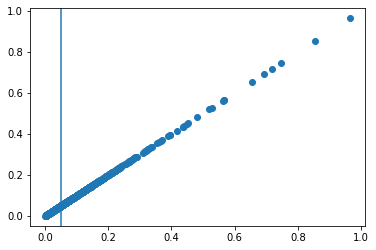

In [4]:
threshold = 0.05
loss_sc = []
for i in result:
    loss = result[i]["loss"]
    loss_sc.append((loss, loss))
plt.scatter(*zip(*loss_sc))
plt.axvline(threshold, 0.0, 1)
print(sum(result[i]["loss"] > threshold for i in range(len(result))))

In [5]:
cmt = torch.zeros(2, 2, dtype=torch.int64)
for key in result:
    anomaly_score = result[key]["loss"]
    if anomaly_score > threshold:
        tl, pl = result[key]["target_label"], 1
    elif result[key]["loss"] < threshold:
        tl, pl = result[key]["target_label"], 0
    cmt[tl, pl] += 1        

Text(33.0, 0.5, 'Real')

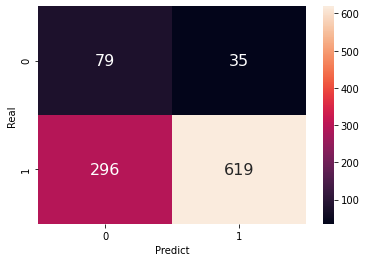

In [6]:
plt.figure()
cm = sns.heatmap(cmt, annot=True, annot_kws={"size": 16}, fmt='g')
cm.set_xlabel("Predict")
cm.set_ylabel("Real")

# Class Repartition

In [7]:
import pandas as pd
from tqdm import tqdm

In [8]:
df = pd.DataFrame.from_dict(result, orient="index")
df_u = pd.read_csv("resources/metadata/audio.csv")

In [9]:
classes_u = list(df_u["class"].unique())
d = {}
for classe in classes_u:
    index = df_u[df_u["class"] == classe].classID.iloc[0]
    d[index] = classe

In [10]:
df["class_name"] = ""
df["anomaly"] = ""

for i, row in tqdm(df.iterrows()):
    df.loc[i, "class_name"] = d[row["target_class"]]
    if df.loc[i, "loss"] > threshold:
        df.loc[i, "anomaly"] = 1
    else:
        df.loc[i, "anomaly"] = 0


1029it [00:00, 2441.31it/s]


## Anamoly class repartition

In [11]:
df[df["anomaly"] == 1]["class_name"].value_counts()

siren       619
dog_bark     35
Name: class_name, dtype: int64

## Normal class repartition

In [12]:
df[df["anomaly"] == 0]["class_name"].value_counts()

siren       296
dog_bark     79
Name: class_name, dtype: int64

# Visualization

In [8]:
import torch

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils.AudioRead import AudioRead

from transforms.AutoencoderTransforms import AutoencoderTransforms
from transforms.MelSpectrogram import MelspectrogramStretch

In [13]:
def plot_img(x):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.imshow(x.squeeze(0).squeeze(0), cmap='magma', interpolation='nearest')

In [14]:
df = pd.read_csv("resources/metadata/audio_test.csv")

audioRead = AudioRead()

trsfm = AutoencoderTransforms({"channels": "avg"})

spec = MelspectrogramStretch(hop_length=None,
            num_mels=128,
            fft_length=2048,
            norm='db')

In [15]:
tensor, sr = trsfm.apply(audioRead.sound_file(f"resources/audio/{row.fold}/{row[0]}"))
label, classID = row[8], row[6]

NameError: name 'row' is not defined

In [16]:
x, lengths = spec(xt, torch.LongTensor(0))

NameError: name 'xt' is not defined